In [1]:
import numpy as np
import matplotlib.pyplot as plt

from plotting import plot_true_vs_pred
from metrics import evaluate_model

In [2]:
# latex rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

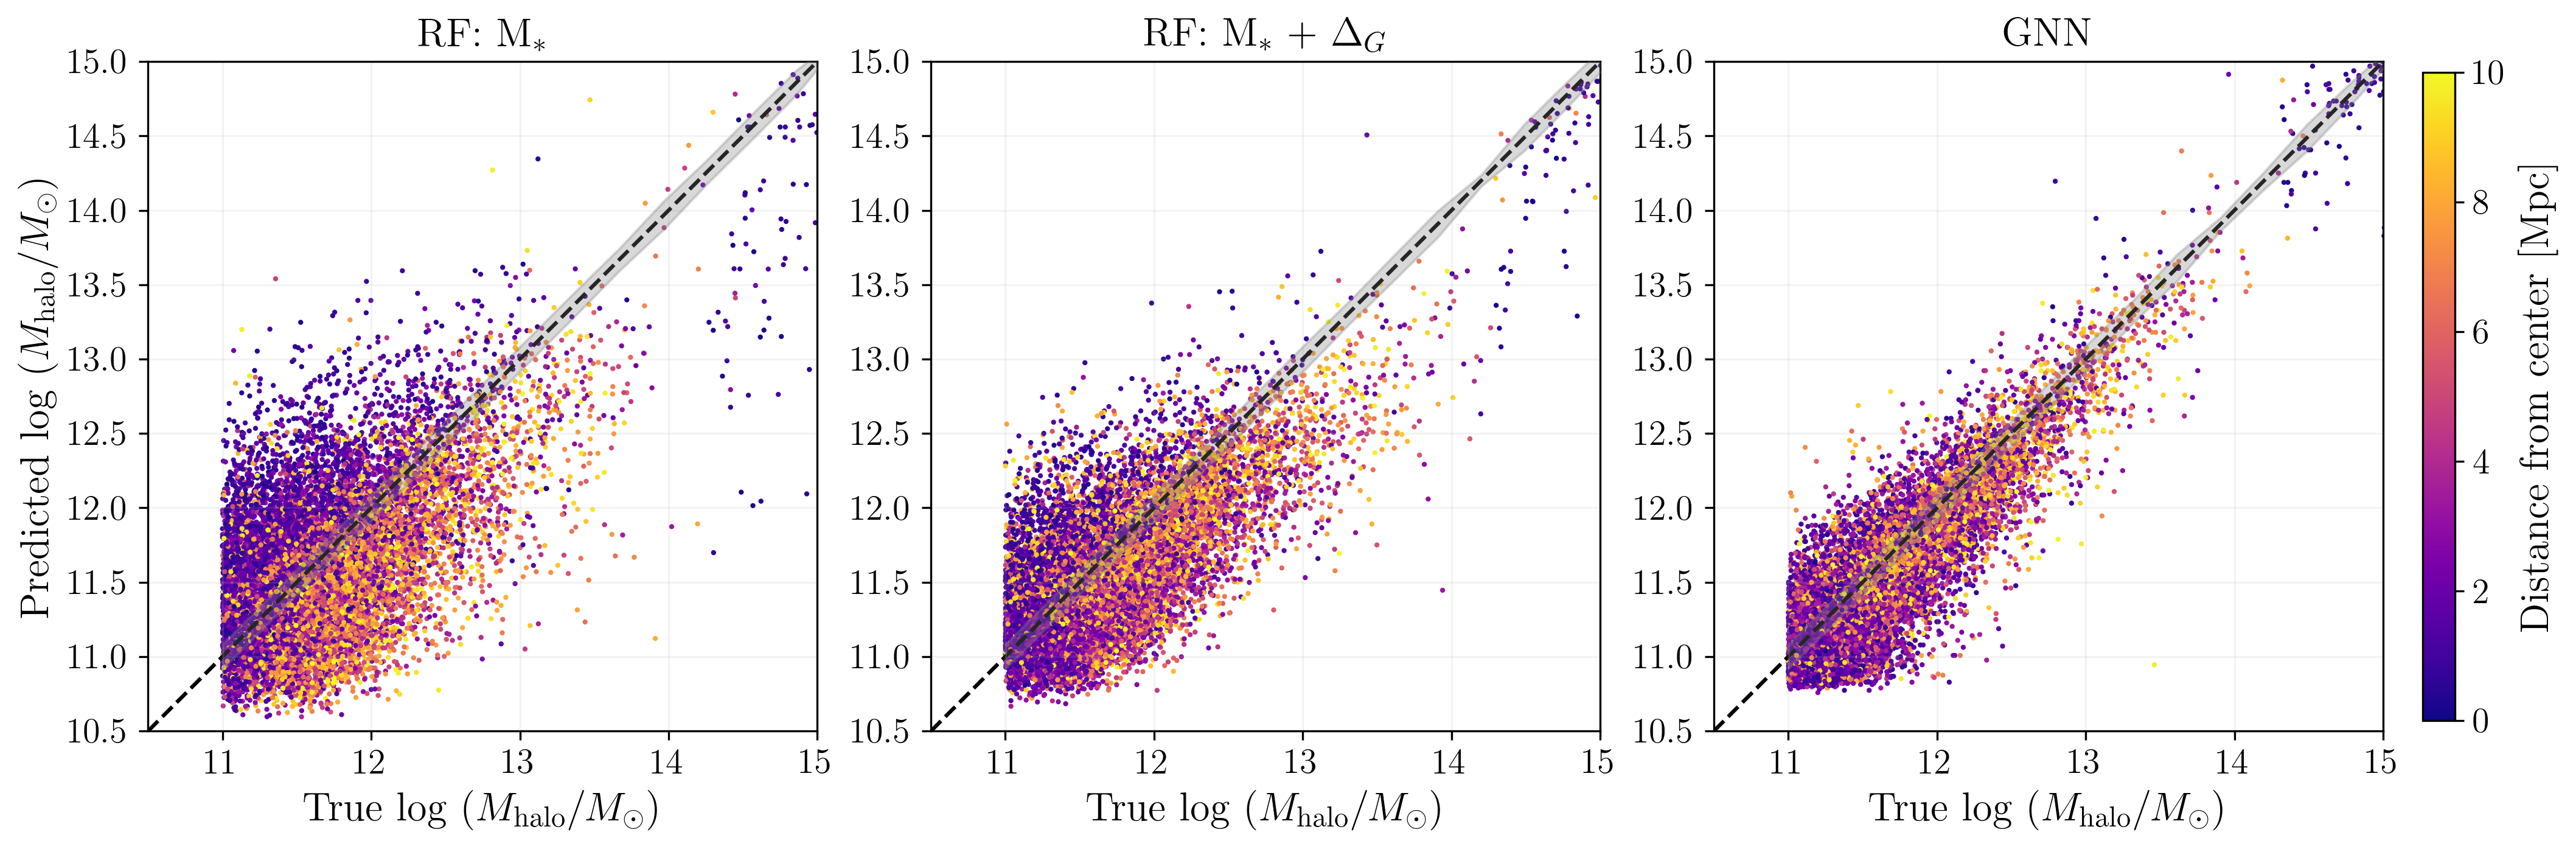

In [3]:
# fig, axes = plt.subplots(2, 2, figsize=(14, 12), dpi=300, constrained_layout=True)
fig, axes = plt.subplots(1, 3, figsize=(14, 6), dpi=300, constrained_layout=True)
axes = axes.flatten()

# Load the data
# 1 Baseline RF
y_baseline = np.load("results/TNG-Cluster_snap99_random_forest_fold_1_y.npy").ravel()
p_baseline = np.load("results/TNG-Cluster_snap99_random_forest_fold_1_p.npy").flatten()
dist_baseline = np.load("results/TNG-Cluster_snap99_random_forest_fold_1_dist.npy").flatten()
# y_baseline = np.load("results/TNG-Cluster_snap99_xg_boost_fold_1_y.npy").ravel()
# p_baseline = np.load("results/TNG-Cluster_snap99_xg_boost_fold_1_p.npy").flatten()
# dist_baseline = np.load("results/TNG-Cluster_snap99_xg_boost_fold_1_dist.npy").flatten()
mask = (y_baseline > 11) & (dist_baseline < 10)
y_baseline = y_baseline[mask]
p_baseline = p_baseline[mask]
dist_baseline = dist_baseline[mask]

# 2 Baseline RF with morphological features
y_morph = np.load("results/TNG-Cluster_snap99_random_forest_fold_1_overdensity_y.npy").ravel()
# y_morph = np.load("results/TNG-Cluster_snap99_xg_boost_fold_1_overdensity_y.npy").ravel()
p_morph = np.load("results/TNG-Cluster_snap99_random_forest_fold_1_overdensity_p.npy").flatten()
# p_morph = np.load("results/TNG-Cluster_snap99_xg_boost_fold_1_overdensity_p.npy").flatten()
dist_morph = np.load("results/TNG-Cluster_snap99_random_forest_fold_1_overdensity_dist.npy").flatten()
# dist_morph = np.load("results/TNG-Cluster_snap99_xg_boost_fold_1_overdensity_dist.npy").flatten()
mask = (y_morph > 11) & (dist_morph < 10)
y_morph = y_morph[mask]
p_morph = p_morph[mask]
dist_morph = dist_morph[mask]

# 3 Adv GNN
y_gnn = np.load("results/TNG-Cluster_snap99_unormalised_distances_clusters_k0-1_lr-0.01_bs-1_y.npy").ravel()
p_gnn = np.load("results/TNG-Cluster_snap99_unormalised_distances_clusters_k0-1_lr-0.01_bs-1_p.npy").flatten()
dist_gnn = np.load("results/TNG-Cluster_snap99_unormalised_distances_clusters_k0-1_lr-0.01_bs-1_dists.npy").flatten()
mask = (y_gnn > 11) & (dist_gnn < 10)
y_gnn = y_gnn[mask]
p_gnn = p_gnn[mask]
dist_gnn = dist_gnn[mask]

# 4 with TNG300 test set
y_300test = np.load("results/TNG-Cluster_snap99_unormalised_distances_clusters_k0-1_lr-0.01_bs-1_run_with_TNG300_y.npy").ravel()
p_300test = np.load("results/TNG-Cluster_snap99_unormalised_distances_clusters_k0-1_lr-0.01_bs-1_run_with_TNG300_p.npy").flatten()
dist_300test = np.load("results/TNG-Cluster_snap99_unormalised_distances_clusters_k0-1_lr-0.01_bs-1_run_with_TNG300_dists.npy").flatten()
mask = (y_300test > 11) & (dist_300test < 10)
y_300test = y_300test[mask]
p_300test = p_300test[mask]
dist_300test = dist_300test[mask]


# RF with TNG300 test set
y_rf300test = np.load('results/TNG-Cluster_snap99_xg_boost_fold_1_with_TNG300_y.npy')
p_rf300test = np.load('results/TNG-Cluster_snap99_xg_boost_fold_1_with_TNG300_p.npy')
dist_rf300test = np.load('results/TNG-Cluster_snap99_xg_boost_fold_1_with_TNG300_dist.npy')
mask = (y_rf300test > 11) & (dist_rf300test < 10)
y_rf300test = y_rf300test[mask]
p_rf300test = p_rf300test[mask]
dist_rf300test = dist_rf300test[mask]

y_rf_ov300test = np.load('results/TNG-Cluster_snap99_xg_boost_fold_1_overdensity_with_TNG300_y.npy')
p_rf_ov300test = np.load('results/TNG-Cluster_snap99_xg_boost_fold_1_overdensity_with_TNG300_p.npy')
dist_rf_ov300test = np.load('results/TNG-Cluster_snap99_xg_boost_fold_1_overdensity_with_TNG300_dist.npy')
mask = (y_rf_ov300test > 11) & (dist_rf_ov300test < 10)
y_rf_ov300test = y_rf_ov300test[mask]
p_rf_ov300test = p_rf_ov300test[mask]
dist_rf_ov300test = dist_rf_ov300test[mask]

plot_true_vs_pred(y_baseline, p_baseline, dist_baseline, ax=axes[0], title=r"RF: $\rm{M}_{\rm{*}}$", cmap='plasma', clabel="Distance from center [Mpc]", colorbar=False, fig=fig)
# plot_true_vs_pred(y_baseline, p_baseline, dist_baseline, ax=axes[0], title=r"XG: $\rm{M}_{\rm{*}}$", cmap='plasma', clabel="Distance from center [Mpc]", colorbar=False, fig=fig)
plot_true_vs_pred(y_morph, p_morph, dist_morph, ax=axes[1], title=r"RF: $\rm{M}_{\rm{*}}$ + $\Delta_G$", cmap='plasma', clabel="Distance from center [Mpc]", colorbar=False, fig=fig)
# plot_true_vs_pred(y_morph, p_morph, dist_morph, ax=axes[1], title=r"XG: $\rm{M}_{\rm{*}}$ + $\Delta_G$", cmap='plasma', clabel="Distance from center [Mpc]", colorbar=False, fig=fig)
a = plot_true_vs_pred(y_gnn, p_gnn, dist_gnn, ax=axes[2], title="GNN", cmap='plasma', clabel="Distance from center [Mpc]", colorbar=False, fig=fig)
# plot_true_vs_pred(y_rf300test, p_rf300test, dist_rf300test, ax=axes[0], title=r"RF: $\rm{M}_{\rm{*}}$ TNG 300", cmap='plasma', clabel="Distance from center [Mpc]", colorbar=False, fig=fig)
# plot_true_vs_pred(y_rf_ov300test, p_rf_ov300test, dist_rf_ov300test, ax=axes[1], title=r"RF: $\rm{M}_{\rm{*}}$ + $\Delta_G$ TNG 300", cmap='plasma', clabel="Distance from center [Mpc]", colorbar=False, fig=fig)
# a = plot_true_vs_pred(y_300test, p_300test, dist_300test, ax=axes[2], title="GNN: TNG 300", cmap='plasma', clabel="Distance from center [Mpc]", colorbar=False, fig=fig)
# a = plot_true_vs_pred(y_300test, p_300test, dist_300test, ax=axes[3], title="GNN: TNG300 test set", cmap='plasma', clabel="Distance from center [Mpc]", fig=fig, colorbar=False)


# get a colorbar for the last plot and make it a common colorbar
cb = fig.colorbar(a.get_children()[0], ax=axes, label="Distance from center [Mpc]", location='right', shrink=0.6, pad=0.01)
cb.set_label("Distance from center [Mpc]", fontsize=16)
cb.ax.tick_params(labelsize=14)

# remove y labels
for ax in axes[1:]:
    ax.set_ylabel("")

# decreasing spacing between plots
# plt.subplots_adjust(hspace=0.1)
# plt.savefig("figures/true_vs_pred_v2.png", bbox_inches='tight')

0.37267494


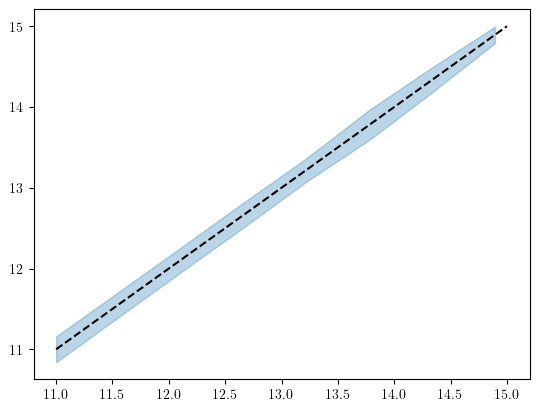

In [8]:
_, edges = np.histogram(y_baseline, bins=8)
# get the scatter of the y_baseline within the bins
scatter = []
scatter_lower = []
for i in range(len(edges)-1):
    mask = (y_baseline >= edges[i]) & (y_baseline < edges[i+1])
    scatter.append(np.std(y_baseline[mask]) + edges[i])
    scatter_lower.append(edges[i] - np.std(y_baseline[mask]))
# plot the scatter against 1-1 line
# plot 1-1
# plt.plot(edges[:-1], scatter, 'o', label='RF: $\rm{M}_{\rm{*}}$', color='tab:blue')
plt.fill_between(edges[:-1], scatter_lower, scatter, color='tab:blue', alpha=0.3)
plt.plot([11, 15], [11, 15], 'k--')

print(scatter[-3]-scatter_lower[-3])

In [9]:
# fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=300, constrained_layout=True)
# a = plot_true_vs_pred(y_300test, p_300test, dist_300test, ax=ax, title="GNN with TNG300 test set", cmap='plasma', clabel="Distance from center [Mpc]", fig=fig, colorbar=False)

# # isolate the colorbar
# cb = a.get_figure().colorbar(a.get_children()[0], ax=a, label="Distance from center [Mpc]", location='right', shrink=0.8, pad=0.01)
# cb.set_label("Distance from center [Mpc]", fontsize=16)

In [10]:
evaluate_model(y_baseline, p_baseline)

{'MSE': np.float32(0.14090993),
 'RMSE': np.float32(0.3753797),
 'MAE': np.float32(0.30220652),
 'Bias': np.float32(-0.071521945),
 'NMAD': np.float32(0.3932875),
 'R^2 Score': 0.5162525177001953,
 'Outlier Fraction': np.float64(0.003278899318503279)}

/home/nikhil/miniconda3/envs/gnn/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nikhil/miniconda3/envs/gnn/lib/python3.11/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/nikhil/miniconda3/envs/gnn/lib/python3.11/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


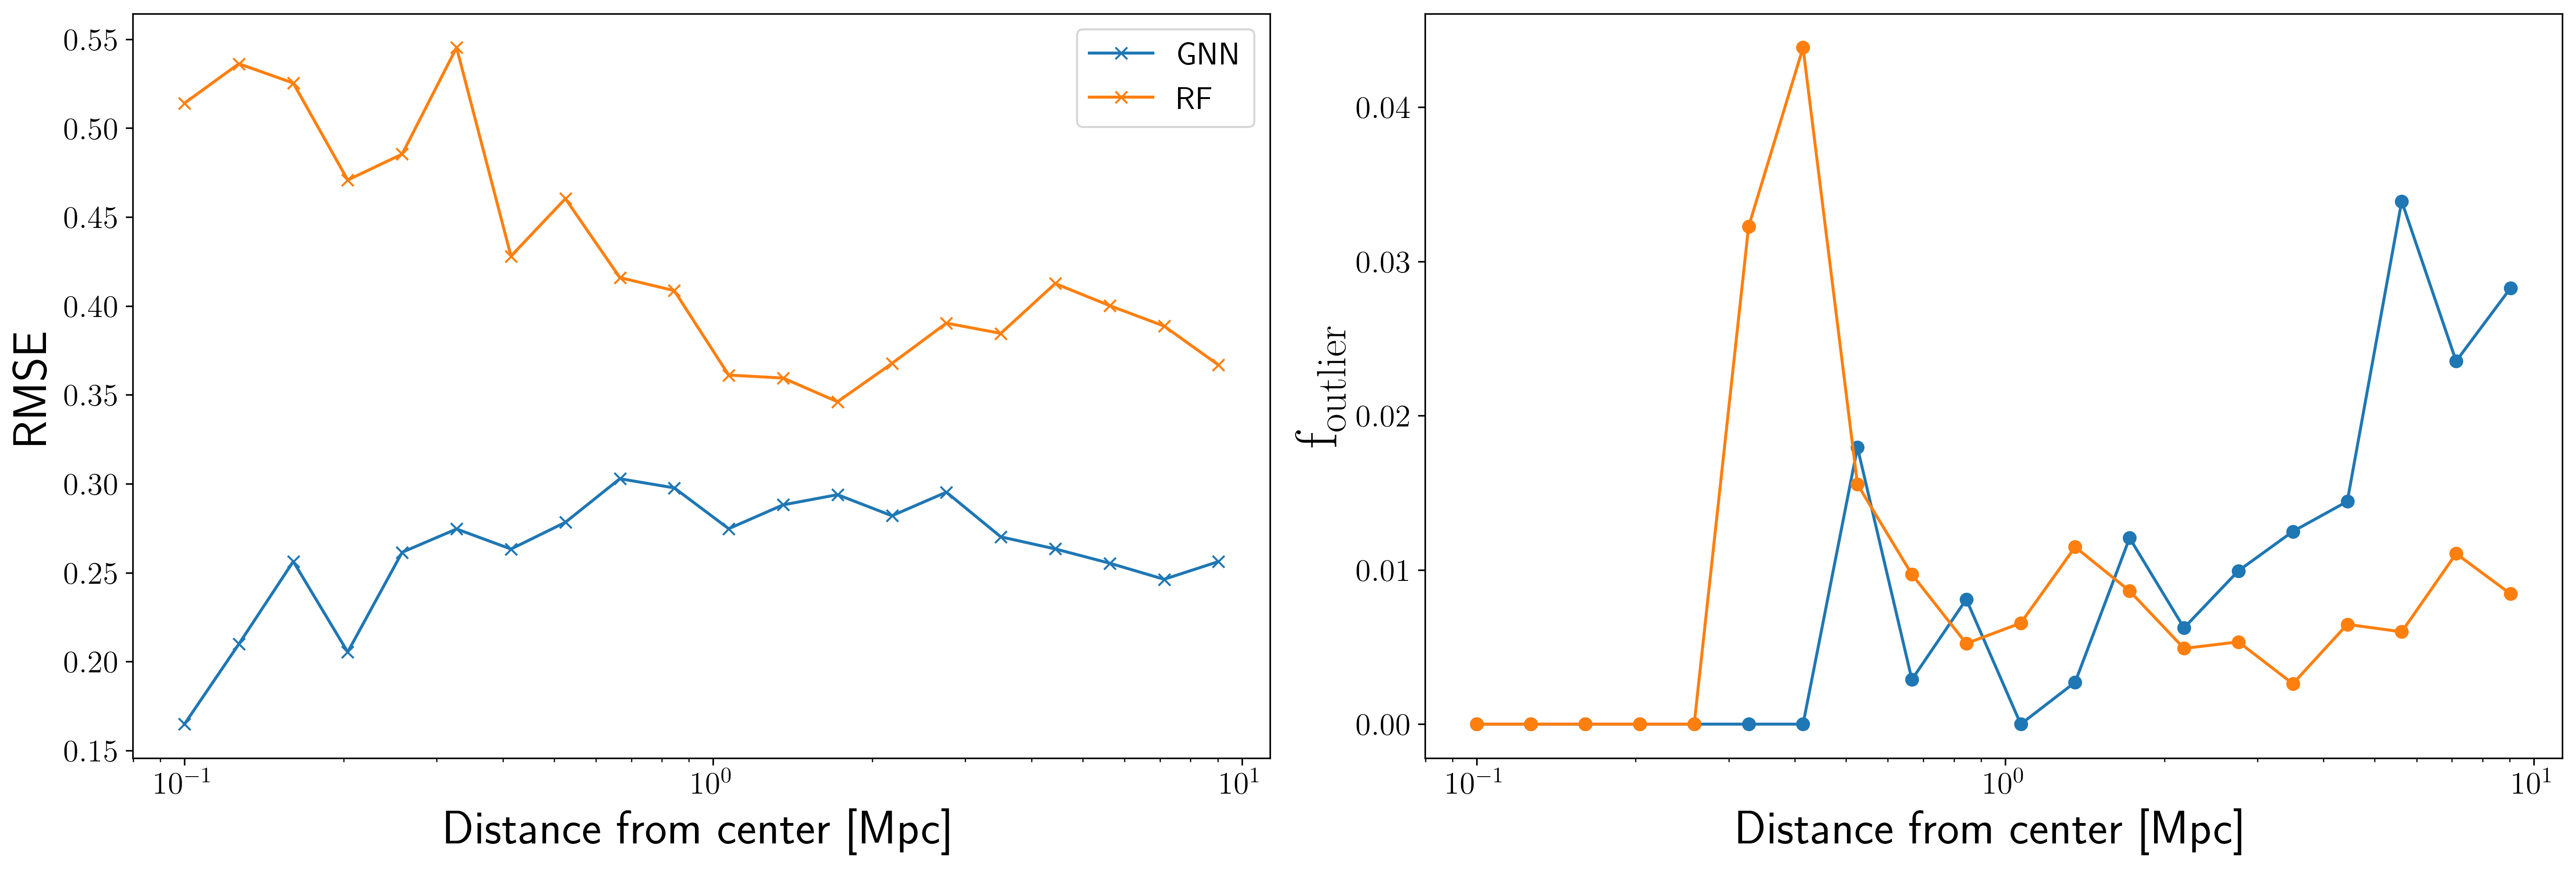

In [20]:
# calculate RMSE for advanced GNN as a function of distance from center
# dist_bins = np.linspace(0, 30, 15)
# dist_bins = [0, 0.5, 1, 2, 3, 4, 5, 7, 10, 15, 20, 30]
dist_bins = np.logspace(-1, 2.5, 35)
rmse = np.zeros(len(dist_bins) - 1)
f_outlier = np.zeros(len(dist_bins) - 1)

for i in range(len(dist_bins) - 1):
    mask = (dist_gnn >= dist_bins[i]) & (dist_gnn < dist_bins[i + 1])
    rmse[i] = np.sqrt(np.mean((y_gnn[mask] - p_gnn[mask])**2))
    nmad = 1.4826 * np.median(np.abs(y_gnn[mask] - p_gnn[mask]))
    f_outlier[i] = np.mean(np.abs(y_gnn[mask] - p_gnn[mask]) > 3 * nmad)

fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=300, constrained_layout=True)
ax[0].plot(dist_bins[:-1], rmse, marker='x')
ax[1].plot(dist_bins[:-1], f_outlier, marker='o')
ax[1].set_xlabel("Distance from center [Mpc]", fontsize=24)
ax[0].set_xlabel("Distance from center [Mpc]", fontsize=24)
ax[0].set_ylabel("RMSE", fontsize=24)
ax[1].set_ylabel(r"$\rm{f}_{\rm{outlier}}$", fontsize=30)
ax[0].set_xscale('log')
ax[1].set_xscale('log')

# set x ticks label size
ax[0].tick_params(axis='both', labelsize=16)
ax[1].tick_params(axis='both', labelsize=16)


# ax[0].set_xlim(0., 5)
# ax[1].set_xlim(0., 5)

# add for RF baseline
rmse = np.zeros(len(dist_bins) - 1)
f_outlier = np.zeros(len(dist_bins) - 1)

for i in range(len(dist_bins) - 1):
    mask = (dist_morph >= dist_bins[i]) & (dist_morph < dist_bins[i + 1])
    rmse[i] = np.sqrt(np.mean((y_morph[mask] - p_morph[mask])**2))
    nmad = 1.4826 * np.median(np.abs(y_morph[mask] - p_morph[mask]))
    f_outlier[i] = np.mean(np.abs(y_morph[mask] - p_morph[mask]) > 3 * nmad)

ax[0].plot(dist_bins[:-1], rmse, marker='x')
ax[1].plot(dist_bins[:-1], f_outlier, marker='o')

ax[0].legend(["GNN", "RF"], fontsize=16)

In [23]:
from metrics import evaluate_model
import pandas as pd

d = {}

for i in range(4):
    y_baseline = np.load(f"results/TNG-Cluster_snap99_xg_boost_fold_{i}_with_TNG300_y.npy").ravel()
    p_baseline = np.load(f"results/TNG-Cluster_snap99_xg_boost_fold_{i}_with_TNG300_p.npy").flatten()
    dist_baseline = np.load(f"results/TNG-Cluster_snap99_xg_boost_fold_{i}_with_TNG300_dist.npy").flatten()
    mask = (y_baseline > 11) & (dist_baseline < 10)
    y_baseline = y_baseline[mask]
    p_baseline = p_baseline[mask]

    d[f'fold_{i}_overdensity'] = evaluate_model(y_baseline, p_baseline)

d = pd.DataFrame(d)
d['mean'] = d.mean(axis=1)
d['std'] = d.std(axis=1)

In [21]:
d.round(3)

,fold_0_overdensity,fold_1_overdensity,fold_2_overdensity,fold_3_overdensity,mean,std
MSE,0.098,0.098,0.098,0.096,0.097,0.001
RMSE,0.312,0.313,0.312,0.310,0.312,0.001
MAE,0.233,0.235,0.233,0.233,0.234,0.001
Bias,-0.056,-0.060,-0.058,-0.056,-0.058,0.002
NMAD,0.272,0.275,0.271,0.270,0.272,0.002
R^2 Score,0.643,0.642,0.643,0.647,0.644,0.002
Outlier Fraction,0.021,0.021,0.022,0.021,0.021,0.001


In [24]:
d.round(3)

,fold_0_overdensity,fold_1_overdensity,fold_2_overdensity,fold_3_overdensity,mean,std
MSE,0.130,0.132,0.130,0.130,0.130,0.001
RMSE,0.361,0.363,0.361,0.360,0.361,0.001
MAE,0.284,0.285,0.284,0.283,0.284,0.001
Bias,-0.158,-0.160,-0.158,-0.157,-0.158,0.001
NMAD,0.359,0.362,0.358,0.357,0.359,0.002
R^2 Score,0.523,0.518,0.523,0.525,0.522,0.003
Outlier Fraction,0.010,0.010,0.010,0.010,0.010,0.000


In [ ]:
# f_outlier = np.mean(np.abs(y_baseline - p_baseline) > 3 * nmad)
nmad = 1.4826 * np.median(np.abs(y_baseline - p_baseline))
np.mean(np.abs(y_baseline - p_baseline) > 0.5), nmad

In [2]:
import pandas as pd
df_cluster = pd.read_parquet("data/TNGCluster-subhalos_99_new.parquet")
df_300 = pd.read_parquet('data/TNG300-1-subhalos_99.parquet')
# df_cluster = df_cluster[df_cluster['subhalo_loghalomass'] > 11]
mask = (df_cluster['subhalo_loghalomass'] > 11) & (df_cluster['distance_from_center'] < 10)
df_cluster = df_cluster[mask]

# evaluate_model(df_cluster['subhalo_loghalomass'], np.ones_like(df_cluster['subhalo_loghalomass']) * df_cluster['subhalo_loghalomass'].mean())
# evaluate_model(df_300['subhalo_loghalomass'], np.ones_like(df_300['subhalo_loghalomass']) * df_300['subhalo_loghalomass'].mean())

In [7]:
df_300[(df_300['subhalo_logstellarmass'] > 9.5) & (df_300['subhalo_logstellarmass'] > 11) & (df_300['distance_from_center'] < 10)].shape

KeyError: 'distance_from_center'

In [6]:
df_cluster

,Group_M_Crit200_log,halo_x,halo_y,halo_z,halo_vx,halo_vy,halo_vz,halo_r200,subhalo_x,subhalo_y,...,subhalo_loghalomass_low,subhalo_logtracers,subhalo_logstellarmass,subhalo_logbhmass,subhalo_n_stellar_particles,subhalo_stellarhalfmassradius,GroupOffsetType_0,subhalo_cluster_id,is_central,distance_from_center
0,15.287194,258.772461,391.547852,666.322998,-200.378784,-212.093628,403.339722,2.628561,258.772461,391.547852,...,-inf,-inf,13.069289,10.919228,1460404,0.110385,0,0,True,2.616940
1,15.287194,258.772461,391.547852,666.322998,-200.378784,-212.093628,403.339722,2.628561,258.205536,386.216339,...,-inf,-inf,12.777189,10.712004,750064,0.103087,0,0,False,4.080657
2,15.287194,258.772461,391.547852,666.322998,-200.378784,-212.093628,403.339722,2.628561,255.516602,384.476105,...,-inf,-inf,12.085868,9.858829,152998,0.037264,0,0,False,5.549464
3,15.287194,258.772461,391.547852,666.322998,-200.378784,-212.093628,403.339722,2.628561,255.713455,392.771423,...,-inf,-inf,12.134773,9.867895,171525,0.022964,0,0,False,5.658062
4,15.287194,258.772461,391.547852,666.322998,-200.378784,-212.093628,403.339722,2.628561,254.578918,381.524719,...,-inf,-inf,11.732138,9.093664,68092,0.004993,0,0,False,9.439205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10373641,11.737535,637.316528,928.757141,954.562561,-368.035095,24.085102,251.935532,0.172393,637.316528,928.757141,...,11.555295,-inf,9.577237,7.275354,135,0.010570,5894650524,5711,True,9.233893
10373652,11.806111,631.579773,929.512451,956.161560,-139.481247,-439.272827,104.368401,0.181699,631.579773,929.512451,...,11.628934,-inf,9.548032,7.233318,85,0.029717,5894654860,5711,True,10.156867
10373675,11.930678,638.444092,921.593933,965.328247,221.153229,-7.408397,-82.212891,0.199930,638.444092,921.593933,...,11.773351,-inf,9.699314,8.019061,54,0.027461,5894661178,5711,True,10.140422
10373687,11.420603,632.799744,938.113647,963.616089,292.897064,-277.065857,322.917694,0.135163,632.799744,938.113647,...,11.193567,-inf,9.684502,8.020268,550,0.011702,5894664845,5711,True,8.738238
